<a href="https://colab.research.google.com/github/taucler/ts228-bag-of-words/blob/main/resimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mise en place et importation de librairies et configurations pour la gestion de mémoire


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

Affichage de a GPU utilisée par défaut pour ce programme

In [ ]:
!nvidia-smi

Sun Apr 18 13:28:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    28W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
Importation de BDD images depuis le Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/imgs_frelon"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5iR9qE7PFKGh2yQ4NhWo-MZabWqnTAn6yR0aktaWiGMQriR9D8pG0
Mounted at /content/drive
imgs_test  imgs_train


Mise en place des paths

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/imgs_frelon/imgs_train'
valid_path = '/content/drive/My Drive/imgs_frelon/imgs_test'

Mise en place du CNN de type Resnet50

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/My Drive/imgs_frelon/imgs_train*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# creation du modèle
model = Model(inputs=resnet.input, outputs=prediction)

Affichage de la structure du modèle

In [ ]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Utilisation du ImageDataGenerator afin de keras afin de créer le training_set et le test_set

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
print(len(training_set))

Found 2886 images belonging to 2 classes.
181


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')
print(len(test_set))
y_true = test_set.classes

Found 720 images belonging to 2 classes.
45


Affichage des classes des images test (1:présence et 0 abscence des frelons)

In [ ]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Mise en place du coût et de la méthode d'optimisation du modèle à utiliser

In [ ]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

Exécution du modèle pour un nombre Epochs=25

In [ ]:
history = model.fit_generator(training_set, epochs=25, validation_data = test_set, verbose = 1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
181/181 [==============================] - 51s 282ms/step - loss: 3.5467 - accuracy: 0.6112 - val_loss: 2.0284 - val_accuracy: 0.6806
Epoch 2/25
181/181 [==============================] - 51s 280ms/step - loss: 3.7941 - accuracy: 0.6085 - val_loss: 6.3046 - val_accuracy: 0.3694
Epoch 3/25
181/181 [==============================] - 51s 281ms/step - loss: 3.6279 - accuracy: 0.6192 - val_loss: 1.1683 - val_accuracy: 0.7472
Epoch 4/25
181/181 [==============================] - 51s 280ms/step - loss: 3.5491 - accuracy: 0.6275 - val_loss: 0.7107 - val_accuracy: 0.7819
Epoch 5/25
181/181 [==============================] - 51s 280ms/step - loss: 3.5144 - accuracy: 0.6227 - val_loss: 6.8511 - val_accuracy: 0.3681
Epoch 6/25
181/181 [==============================] - 51s 280ms/step - loss: 3.4415 - accuracy: 0.6299 - val_loss: 1.7958 - val_accuracy: 0.5528
Epoch 7/25
181/181 [==============================] - 51s 281ms/step - loss: 3.3841 - accuracy: 0.6435 - val_loss: 1.9316 - val_ac

Affichage des courbes

In [ ]:
import matplotlib.pyplot as plt

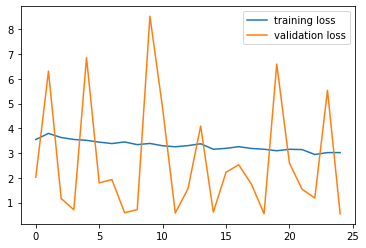

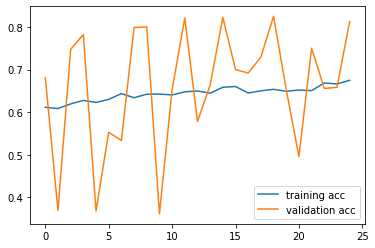

<Figure size 432x288 with 0 Axes>

In [ ]:
# figure du loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('loss _value')

# figure accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.legend()
plt.show()
plt.savefig('accuracy_value')

Mise en place de la prédiction et ses affichages

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.3326260e-07, 9.9999988e-01],
       [4.1698551e-01, 5.8301449e-01],
       [1.3838559e-02, 9.8616147e-01],
       ...,
       [1.1033798e-03, 9.9889660e-01],
       [9.7582859e-01, 2.4171401e-02],
       [9.9958485e-01, 4.1519801e-04]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
len(y_pred)

720

In [ ]:
from sklearn.metrics import accuracy_score

Précision de l'algorithme

In [ ]:
accuracy_score(y_true, y_pred)

0.5402777777777777

Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(y_true,y_pred, labels=[1,0])
print('Matrice de confusion : \n',matrix)

Matrice de confusion : 
 [[107 153]
 [178 282]]


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])

In [ ]:
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

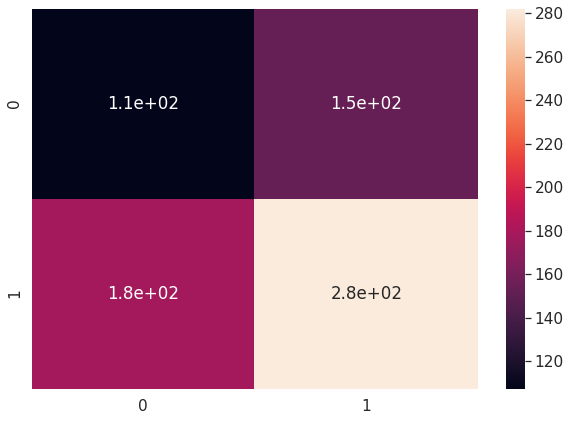

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Rapport de classification

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
matrix2 = classification_report(y_true,y_pred,labels=[1,0])
print('Rapport de classification : \n',matrix2)

Rapport de classification : 
               precision    recall  f1-score   support

           1       0.38      0.41      0.39       260
           0       0.65      0.61      0.63       460

    accuracy                           0.54       720
   macro avg       0.51      0.51      0.51       720
weighted avg       0.55      0.54      0.54       720



Stockage des résultats

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


In [ ]:
model.save("frelons.hdf5")